### Risk index/safety index/metric ideation

- (fatalities + major injuries + minor injuries) / total passengers?
- mean of the above numbers for every make and model?
- risk index number with weights for fatal_fraction, serious_fraction, minor_fraction

In [84]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [85]:
df = pd.read_csv('data_cleaned_final.csv')

In [86]:
# Reorder columns
df = df.reindex(columns=['Date', 'Year', 'Month', 'Location', 'Country', 'Injury_Severity', 'Damage_Type', 'Aircraft_Category', 'Make', 'Model', 'Engines', 'Engine_Type', 'Fatal_Injuries', 'Serious_Injuries', 'Minor_Injuries', 'Uninjured', 'Total_Passengers', 'Weather'])

In [87]:
# Creating columns for the fraction of each injury type relative to total passengers
df['Fatal_Injuries_Fraction'] = df['Fatal_Injuries'] / df['Total_Passengers']
df['Serious_Injuries_Fraction'] = df['Serious_Injuries'] / df['Total_Passengers']
df['Minor_Injuries_Fraction'] = df['Minor_Injuries'] / df['Total_Passengers']
df['Uninjured_Fraction'] = df['Uninjured'] / df['Total_Passengers']

In [88]:
w1 = 0.6
w2 = 0.3
w3 = 0.1

df['Risk_Index'] = (w1 * df['Fatal_Injuries_Fraction']) + (w2 * df['Serious_Injuries_Fraction']) + (w3 * df['Minor_Injuries_Fraction'])

In [91]:
sizewise = [
    df['Total_Passengers'] < 100,
    (df['Total_Passengers'] >= 100) & (df['Total_Passengers'] <= 249),
    df['Total_Passengers'] >= 250
]

choices = ['Small', 'Medium', 'Large']

df['Plane_Size'] = np.select(sizewise, choices, default='unknown')


In [92]:
df['Plane_Size'].value_counts()

Plane_Size
Small     37251
Medium      167
Large        43
Name: count, dtype: int64

In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37461 entries, 0 to 37460
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       37461 non-null  object 
 1   Year                       37461 non-null  int64  
 2   Month                      37461 non-null  int64  
 3   Location                   37459 non-null  object 
 4   Country                    37461 non-null  object 
 5   Injury_Severity            37461 non-null  object 
 6   Damage_Type                37461 non-null  object 
 7   Aircraft_Category          37461 non-null  object 
 8   Make                       37461 non-null  object 
 9   Model                      37461 non-null  object 
 10  Engines                    37461 non-null  float64
 11  Engine_Type                36420 non-null  object 
 12  Fatal_Injuries             37461 non-null  float64
 13  Serious_Injuries           37461 non-null  flo

In [125]:
df.drop(columns=['Mean_Risk_Index', 'Model_Total_Accidents'], inplace=True)

In [127]:
# Creating Mean Risk Index for each plane model
model_mean_risk_index = df.groupby('Make_and_Model')['Risk_Index'].mean()
# Add column mean_risk_index to df
df = df.join(model_mean_risk_index, on='Make_and_Model', rsuffix='_mean')

In [128]:
# Total number of accidents for each model
model_total_accidents = df['Make_and_Model'].value_counts()
# Add column model_total_accidents to df
df = df.join(model_total_accidents, on='Make_and_Model', rsuffix='_total')

In [38]:
type(model_mean_risk_index)

pandas.core.series.Series

In [43]:
# Finding the safest planes
df_safe_planes = df.loc[(df['Risk_Index_mean'] == 0) & (df['Damage_Type'] == 'Minor')]

In [83]:
df_safe_planes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 33 entries, 790 to 36770
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       33 non-null     object 
 1   Year                       33 non-null     int64  
 2   Month                      33 non-null     int64  
 3   Location                   33 non-null     object 
 4   Country                    33 non-null     object 
 5   Injury_Severity            33 non-null     object 
 6   Damage_Type                33 non-null     object 
 7   Aircraft_Category          33 non-null     object 
 8   Make                       33 non-null     object 
 9   Model                      33 non-null     object 
 10  Engines                    33 non-null     float64
 11  Engine_Type                32 non-null     object 
 12  Fatal_Injuries             33 non-null     float64
 13  Serious_Injuries           33 non-null     float64
 

In [47]:
df_safe_planes['Plane_Size'].value_counts()

Plane_Size
Small     17
Medium     8
Large      8
Name: count, dtype: int64

In [48]:
df_safe_planes.loc[df_safe_planes['Plane_Size'] == 'Small']

,Date,Year,Month,Location,Country,Injury_Severity,Damage_Type,Aircraft_Category,Make,Model,...,Uninjured,Total_Passengers,Weather,Fatal_Injuries_Fraction,Serious_Injuries_Fraction,Minor_Injuries_Fraction,Uninjured_Fraction,Risk_Index,Plane_Size,Risk_Index_mean
800,1990-06-17,1990,6,"TAKU, AK",United States,Non-Fatal,Minor,Airplane,cessna,206U,...,10.0,10.0,VMC,0.0,0.0,0.0,1.0,0.0,Small,0.0
1631,1990-10-29,1990,10,"COLUMBUS, OH",United States,Non-Fatal,Minor,Airplane,mcdonnell douglas,DC 9 31,...,49.0,49.0,VMC,0.0,0.0,0.0,1.0,0.0,Small,0.0
3440,1991-10-24,1991,10,"DAYTONA BEACH, FL",United States,Non-Fatal,Minor,Airplane,piper,PA 28 R 180,...,3.0,3.0,VMC,0.0,0.0,0.0,1.0,0.0,Small,0.0
6293,1993-07-28,1993,7,"FOND DU LAC, WI",United States,Non-Fatal,Minor,Airplane,north american,F 51,...,5.0,5.0,VMC,0.0,0.0,0.0,1.0,0.0,Small,0.0
7902,1994-07-31,1994,7,"READINGTON, NJ",United States,Non-Fatal,Minor,Airplane,boeing,PT 13,...,4.0,4.0,VMC,0.0,0.0,0.0,1.0,0.0,Small,0.0
9447,1995-07-28,1995,7,"DALLAS, TX",United States,Non-Fatal,Minor,Airplane,boeing,737 3A4,...,99.0,99.0,VMC,0.0,0.0,0.0,1.0,0.0,Small,0.0
9475,1995-08-01,1995,8,"GLENDALE, AZ",United States,Non-Fatal,Minor,Airplane,north american,AT 6B,...,3.0,3.0,VMC,0.0,0.0,0.0,1.0,0.0,Small,0.0
10305,1996-02-20,1996,2,"FAIRBANKS, AK",United States,Non-Fatal,Minor,Airplane,boeing,757 232,...,91.0,91.0,VMC,0.0,0.0,0.0,1.0,0.0,Small,0.0
10424,1996-03-23,1996,3,"NASHVILLE, TN",United States,Non-Fatal,Minor,Airplane,piper,PA 28 201,...,5.0,5.0,VMC,0.0,0.0,0.0,1.0,0.0,Small,0.0
15871,1999-10-17,1999,10,"JEAN, NV",United States,Non-Fatal,Minor,Airplane,waco,UPF7,...,5.0,5.0,VMC,0.0,0.0,0.0,1.0,0.0,Small,0.0


In [49]:
df_safe_planes.loc[df_safe_planes['Plane_Size'] == 'Small']['Make'].value_counts()

Make
boeing               6
piper                3
cessna               2
north american       2
waco                 2
mcdonnell douglas    1
gulfstream           1
Name: count, dtype: int64

In [33]:
df_safe_planes.loc[df_safe_planes['Plane_Size'] == 'Small'][100:]

,Date,Year,Month,Location,Country,Injury_Severity,Damage_Type,Aircraft_Category,Make,Model,...,Minor_Injuries,Uninjured,Total_Passengers,Weather,Fatal_Injuries_Fraction,Serious_Injuries_Fraction,Minor_Injuries_Fraction,Uninjured_Fraction,Risk_Index,Plane_Size
32382,2015-11-15,2015,11,"Greeley, CO",United States,Non-Fatal,Minor,Airplane,piper,J3C,...,0.0,2.0,2.0,VMC,0.0,0.0,0.0,1.0,0.0,Small
32500,2016-02-03,2016,2,"San Diego, CA",United States,Non-Fatal,Minor,Airplane,cessna,172S,...,0.0,4.0,4.0,VMC,0.0,0.0,0.0,1.0,0.0,Small
32961,2016-08-13,2016,8,"Fort Lauderdale, FL",United States,Non-Fatal,Minor,Airplane,piper,PA 34,...,0.0,3.0,3.0,VMC,0.0,0.0,0.0,1.0,0.0,Small
33510,2017-06-08,2017,6,"Harrisonville, MO",United States,Non-Fatal,Minor,Airplane,piper,PA 28 235,...,0.0,1.0,1.0,VMC,0.0,0.0,0.0,1.0,0.0,Small
33606,2017-07-08,2017,7,"San Jose, CA",United States,Non-Fatal,Minor,Airplane,cessna,R182,...,0.0,7.0,7.0,VMC,0.0,0.0,0.0,1.0,0.0,Small
34869,2019-03-21,2019,3,"Hollywood, FL",United States,Non-Fatal,Minor,Airplane,cessna,172,...,0.0,3.0,3.0,VMC,0.0,0.0,0.0,1.0,0.0,Small
35186,2019-07-27,2019,7,"Gaithersburg, MD",United States,Non-Fatal,Minor,Airplane,cessna,172,...,0.0,3.0,3.0,VMC,0.0,0.0,0.0,1.0,0.0,Small
35390,2019-10-22,2019,10,"Lamesa, TX",United States,Non-Fatal,Minor,Airplane,air tractor,AT 502,...,0.0,1.0,1.0,VMC,0.0,0.0,0.0,1.0,0.0,Small
35407,2019-10-31,2019,10,"Honolulu, HI",United States,Non-Fatal,Minor,Airplane,cessna,208,...,0.0,3.0,3.0,VMC,0.0,0.0,0.0,1.0,0.0,Small
35492,2020-01-08,2020,1,"Palm Coast, FL",United States,Non-Fatal,Minor,Airplane,cessna,172,...,0.0,2.0,2.0,VMC,0.0,0.0,0.0,1.0,0.0,Small


In [50]:
df_safe_planes.to_csv('safest_planes.csv', index=False)

In [130]:
df.rename(columns={'Risk_Index_mean': 'Mean_Risk_Index', 'count': 'Model_Total_Accidents'}, inplace=True)

In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37461 entries, 0 to 37460
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       37461 non-null  object 
 1   Year                       37461 non-null  int64  
 2   Month                      37461 non-null  int64  
 3   Location                   37459 non-null  object 
 4   Country                    37461 non-null  object 
 5   Injury_Severity            37461 non-null  object 
 6   Damage_Type                37461 non-null  object 
 7   Aircraft_Category          37461 non-null  object 
 8   Make                       37461 non-null  object 
 9   Model                      37461 non-null  object 
 10  Engines                    37461 non-null  float64
 11  Engine_Type                36420 non-null  object 
 12  Fatal_Injuries             37461 non-null  float64
 13  Serious_Injuries           37461 non-null  flo

In [132]:
df_make_model = df.groupby(['Make', 'Model'])[['Mean_Risk_Index', 'Model_Total_Accidents']].mean()


In [133]:
# Make Plane_Size column in df_make_model by mapping the Plane_Size column from df
df_make_model = df_make_model.join(df.groupby(['Make', 'Model'])['Plane_Size'].first())


In [134]:
df_make_model.to_csv('make_model_risk.csv')

In [99]:
df.to_csv('data_cleaned_and_amended.csv', index=False)

In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37461 entries, 0 to 37460
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       37461 non-null  object 
 1   Year                       37461 non-null  int64  
 2   Month                      37461 non-null  int64  
 3   Location                   37459 non-null  object 
 4   Country                    37461 non-null  object 
 5   Injury_Severity            37461 non-null  object 
 6   Damage_Type                37461 non-null  object 
 7   Aircraft_Category          37461 non-null  object 
 8   Make                       37461 non-null  object 
 9   Model                      37461 non-null  object 
 10  Engines                    37461 non-null  float64
 11  Engine_Type                36420 non-null  object 
 12  Fatal_Injuries             37461 non-null  float64
 13  Serious_Injuries           37461 non-null  flo

In [106]:
df.head()

,Date,Year,Month,Location,Country,Injury_Severity,Damage_Type,Aircraft_Category,Make,Model,...,Total_Passengers,Weather,Fatal_Injuries_Fraction,Serious_Injuries_Fraction,Minor_Injuries_Fraction,Uninjured_Fraction,Risk_Index,Plane_Size,Mean_Risk_Index,Model_Total_Accidents
0,1990-01-01,1990,1,"ELKHART, IN",United States,Non-Fatal,Substantial,Airplane,cessna,150F,...,2.0,VMC,0.0,0.0,0.0,1.0,0.0,Small,0.140244,164
1,1990-01-02,1990,1,"MILLIS, MA",United States,Non-Fatal,Substantial,Airplane,cessna,150,...,1.0,VMC,0.0,0.0,1.0,0.0,0.1,Small,0.101643,439
2,1990-01-03,1990,1,"APPLE VALLEY, CA",United States,Non-Fatal,Minor,Airplane,cessna,172M,...,5.0,VMC,0.0,0.0,0.0,1.0,0.0,Small,0.122319,539
3,1990-01-03,1990,1,"SLIPPERY ROCK, PA",United States,Non-Fatal,Substantial,Airplane,aeronca,11CC,...,1.0,VMC,0.0,0.0,0.0,1.0,0.0,Small,0.058333,6
4,1990-01-03,1990,1,"APPLE VALLEY, CA",United States,Non-Fatal,Substantial,Airplane,mooney,MARK 22,...,5.0,VMC,0.0,0.0,0.0,1.0,0.0,Small,0.000000,1


In [107]:
df['Make_and_Model'] = df['Make'] + ' ' + df['Model']

In [121]:
df.loc[df['Make_and_Model'] == 'piper 180']

,Date,Year,Month,Location,Country,Injury_Severity,Damage_Type,Aircraft_Category,Make,Model,...,Weather,Fatal_Injuries_Fraction,Serious_Injuries_Fraction,Minor_Injuries_Fraction,Uninjured_Fraction,Risk_Index,Plane_Size,Mean_Risk_Index,Model_Total_Accidents,Make_and_Model
2245,1991-04-06,1991,4,"ANDES, NY",United States,Non-Fatal,Substantial,Airplane,piper,180,...,VMC,0.0,0.0,0.0,1.0,0.0,Small,0.053314,439,piper 180


In [136]:
top_ten = ['cessna 185', 'cessna 180', 'piper PA 22', 'cessna 170B', 'cessna 172R', 'cessna 170', 'grumman G 164A', 'piper PA 18', 'cessna 120', 'cessna 140']

filtered_df = df[df['Make_and_Model'].isin(top_ten)]

In [119]:
filtered_df.head()

,Date,Year,Month,Location,Country,Injury_Severity,Damage_Type,Aircraft_Category,Make,Model,...,Weather,Fatal_Injuries_Fraction,Serious_Injuries_Fraction,Minor_Injuries_Fraction,Uninjured_Fraction,Risk_Index,Plane_Size,Mean_Risk_Index,Model_Total_Accidents,Make_and_Model
9,1990-01-05,1990,1,"AGUA DULCE, CA",United States,Non-Fatal,Destroyed,Airplane,cessna,185,...,VMC,0.0,0.0,0.0,1.0,0.0,Small,0.053330,167,cessna 185
16,1990-01-06,1990,1,"BETTLES, AK",United States,Non-Fatal,Substantial,Airplane,piper,PA 22,...,VMC,0.0,0.0,0.0,1.0,0.0,Small,0.053941,129,piper PA 22
45,1990-01-13,1990,1,"CROCKETT, TX",United States,Non-Fatal,Substantial,Airplane,cessna,170,...,VMC,0.0,0.0,0.0,1.0,0.0,Small,0.068819,120,cessna 170
84,1990-01-21,1990,1,"WILLOW, AK",United States,Non-Fatal,Substantial,Airplane,cessna,185,...,VMC,0.0,0.0,0.0,1.0,0.0,Small,0.053330,167,cessna 185
119,1990-02-04,1990,2,"BORING, OR",United States,Non-Fatal,Substantial,Airplane,piper,PA 22,...,VMC,0.0,0.0,0.0,1.0,0.0,Small,0.053941,129,piper PA 22


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'cessna 185'),
  Text(1, 0, 'piper PA 22'),
  Text(2, 0, 'cessna 170'),
  Text(3, 0, 'piper PA 18'),
  Text(4, 0, 'cessna 180'),
  Text(5, 0, 'cessna 120'),
  Text(6, 0, 'grumman G 164A'),
  Text(7, 0, 'cessna 140'),
  Text(8, 0, 'cessna 170B'),
  Text(9, 0, 'cessna 172R')])

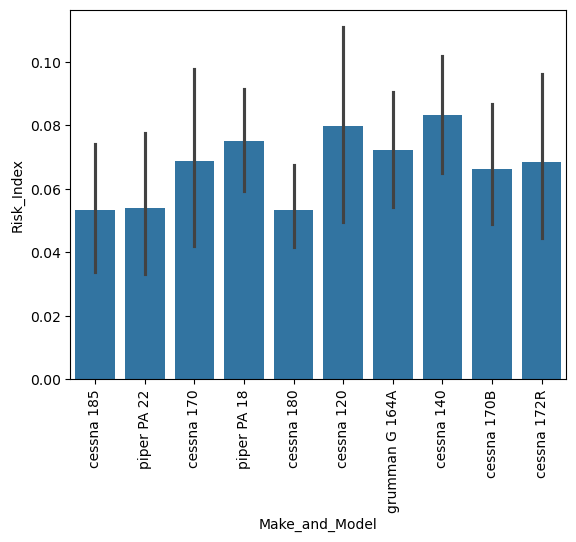

In [140]:
sns.barplot(x='Make_and_Model', y='Risk_Index', data=filtered_df)
plt.xticks(rotation=90)

In [141]:
bottom_ten = ['piper PA 30', 'piper PA 32 260', 'cessna 208B', 'mooney M20K', 'cirrus SR22', 'cessna P210N', 'beechcraft A36', 'piper PA 32R 300', 'piper PA 23 250', 'beechcraft 58']

In [142]:
another_df = df[df['Make_and_Model'].isin(bottom_ten)]

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'piper PA 30'),
  Text(1, 0, 'piper PA 23 250'),
  Text(2, 0, 'mooney M20K'),
  Text(3, 0, 'cessna P210N'),
  Text(4, 0, 'piper PA 32R 300'),
  Text(5, 0, 'cessna 208B'),
  Text(6, 0, 'beechcraft 58'),
  Text(7, 0, 'piper PA 32 260'),
  Text(8, 0, 'beechcraft A36'),
  Text(9, 0, 'cirrus SR22')])

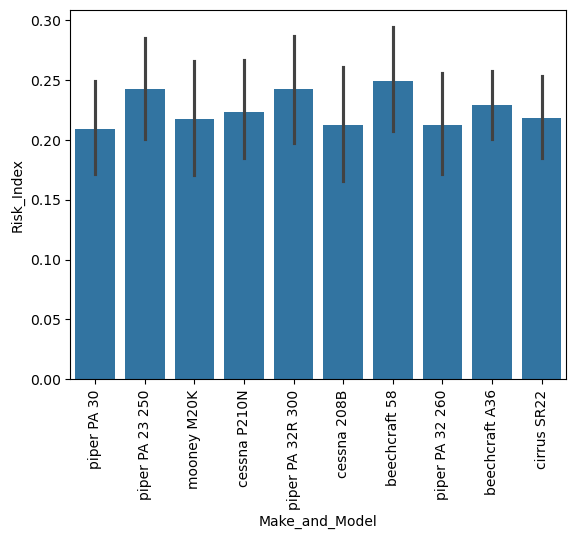

In [143]:
sns.barplot(x='Make_and_Model', y='Risk_Index', data=another_df)
plt.xticks(rotation=90)